# **Section 2: 1-D linear regression: theory and code**
<a href="https://colab.research.google.com/github/osuranyi/UdemyCourses/blob/main/LinearRegression/Section3_LinearRegression1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are looking for the line best fitting our dataset of $(x_i,y_i)$ points. This equation can be written as
$$
\hat{y}_i = ax_i + b,
$$
where $\hat{y}_i$ are called predictions. We the predictions to be as close as possible to actual $y_i$ values. The most common way to ensure this is to minimeze the sum of squared error:
$$
E = \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{N} (y_i - (ax_i + b))^2.
$$
In order to find the minimum, we take partial derivatives with respect to $a$ and $b$, and set them to zero:
\begin{align}
\frac{\partial E}{\partial a} &= \sum_{i=1}^N 2(y_i - (ax_i+b))(-x_i) = 0, \\
\frac{\partial E}{\partial b} &= \sum_{i=1}^N 2(y_i - (ax_i+b))(-1) = 0,
\end{align}
After expanding the parentheses and rearranging the terms, we get:
\begin{align}
a\sum_{i=1}^N x_i^2 + b \sum_{i=1}^N x_i &= \sum_{i=1}^{N}x_iy_i, \\
a\sum_{i=1}^N x_i + b N &= \sum_{i=1}^{N}y_i.
\end{align}
This is a system of two linear equations with two unknown variables ($a$ and $b$). We can write this in a more compact form by introducing the following expressions:
$$
\overline{x} = \frac{1}{N} \sum_{i=1}^N x_i,\quad \overline{x^2} = \frac{1}{N} \sum_{i=1}^N x_i^2, \quad \overline{xy} = \frac{1}{N} \sum_{i=1}^N x_iy_i.
$$
Then the linear system becomes:
\begin{align}
a \overline{x^2} + b \overline{x} &= \overline{xy}, \\
a \overline{x} + b &= \overline{y}.
\end{align}
We multiply the second equation by $\overline{x}$ and subtract it from the first, we get $a$:
$$
a = \frac{\overline{xy} -\overline{x}\cdot \overline{y}}{\overline{x^2}-\overline{x}^2}.
$$
Substituting back $a$ in the second equation, we get $b$:
$$
b = \overline{y} - \frac{\overline{x} \cdot \overline{xy}  -\overline{x}^2\cdot \overline{y}}{\overline{x^2}-\overline{x}^2} = \frac{\overline{x^2}\overline{y} - \overline{x} \cdot \overline{xy} }{\overline{x^2}-\overline{x}^2}.
$$

Now, let's implement this in Python! \\
First, import numpy and matplotlib:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We implement a 1D linear regression class:

In [2]:
class LinearRegression1D:
  def fit(self,x,y):
    invN = 1.0/len(x)
    x_bar = invN * x.sum()
    y_bar = invN * y.sum()
    x2_bar = invN * x.dot(x)
    xy_bar = invN * x.dot(y)

    denominator = x2_bar - x_bar*x_bar

    self.a = (xy_bar - x_bar * y_bar) / denominator
    self.b = (x2_bar*y_bar - x_bar*xy_bar) / denominator

  def predict(self,x):
    return self.a * x + self.b

  def score(self,x,y):
    res = y - self.predict(x)
    SSres = res.dot(res)
    tot = y - y.mean()
    SStot = tot.dot(tot)
    return 1. - SSres/SStot

And test the code:

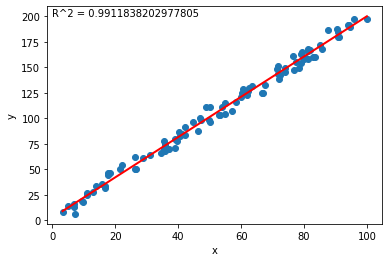

In [3]:
# we read in the data
data = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/data_1d.csv',header=None)
x = data[0].values
y = data[1].values

# and create the model class
model = LinearRegression1D()
model.fit(x,y)

#plotting the results
xline = np.linspace(x.min(),x.max(),1000)
yline = model.predict(xline)
plt.scatter(x,y)
plt.plot(xline,yline,c='r',linewidth=2)
plt.xlabel('x')
plt.ylabel('y');
plt.text(0,200,'R^2 = '+str(model.score(x,y)));

## **Moore's law**

Moore's law states that the number of transistor ($N$) on an integrated circuit grows exponentially over time ($t$) -- actually, it doubles every two year. This can be expressed in the form:
$$
N(t) = T_0 \cdot 2^{\frac{t-t_0}{\tau}},
$$
where $t_0$ is the initial time, $N_0$ is the number of transistors at $t_0$, and $\tau$ is the doubling time: the number of years necessary for the number of transistors to double, if we measure $t$ in years. In order to  use linear regression, we should linearize this equation: take the natural logarithm of both sides:
$$
\ln N = \ln N_0 + \frac{t-t_0}{\tau} \ln{2}.
$$
Rearranging this equation:
$$
\ln N = \frac{\ln 2}{\tau} t + \ln N_0 - \frac{\ln 2}{\tau} t_0.
$$
This in a form of $y=ax+b$ with
\begin{align}
y &= \ln N, \\
x &= t, \\
a &= \frac{\ln 2}{\tau}, \\
b &= \ln N_0 - \frac{\ln 2}{\tau} t_0.
\end{align}
Thus, if we perform a linear regression on points $(t_i,\ln N_i)$, we might calculate the doubling time from $a$:
$$
\tau = \ln 2 / a
$$

In [4]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/moore.csv

--2021-12-31 17:11:33--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/linear_regression_class/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5798 (5.7K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   5.66K  --.-KB/s    in 0s      

2021-12-31 17:11:33 (38.1 MB/s) - ‘moore.csv’ saved [5798/5798]



a:  0.3510435733650517
b:  -685.0002843818112
doubling time:  1.9745331723795398
R^2:  0.9529442852285762


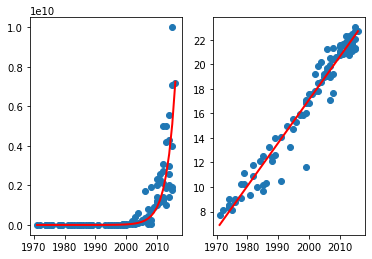

In [10]:
# we read in the data
import re
x = []
y = []

# some numbers show up as 1,170,000,000 (commas)
# some numbers have references in square brackets after them
non_decimal = re.compile(r'[^\d]+')

for line in open('moore.csv'):
    r = line.split('\t')

    x_temp = int(non_decimal.sub('', r[2].split('[')[0]))
    y_temp = int(non_decimal.sub('', r[1].split('[')[0]))
    x.append(x_temp)
    y.append(y_temp)

x = np.array(x)
y = np.array(y)

model = LinearRegression1D()

model.fit(x,np.log(y))

pred = model.predict(x)

plt.subplot(1,2,1)
plt.scatter(x,y)
plt.plot(x,np.exp(pred),c='r',linewidth=2)
plt.subplot(1,2,2)
plt.scatter(x,np.log(y))
plt.plot(x,pred,c='r',linewidth=2);

print("a: ",model.a)
print("b: ",model.b)
print("doubling time: ", np.log(2)/model.a)
print("R^2: ",model.score(x,np.log(y)))